In [2]:
import sys
import os
sys.path.insert(0, '/Users/christopherlee/Desktop/SIP_2021/kaepora/src')
os.chdir('/Users/christopherlee/Desktop/SIP_2021/kaepora/src')

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import kaepora as kpora
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#spectra_querry = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN"]
spectra_querry = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase <= 200 and ((dm15_source > 1 and dm15_source < 1.03) or (dm15_from_fits > 1 and dm15_from_fits < 1.03))"]



In [10]:
spec_array = kpora.grab(spectra_querry[0], db_file = '/Users/christopherlee/Desktop/SIP_2021/kaepora/data/kaepora_v1.2.db')

135 Total Spectra found
135 spectra of SNe that have host reddening corrections
Arrays cleaned


(array([27., 36., 31., 16., 15.,  5.,  3.,  1.,  0.,  1.]),
 array([ -9.56570887,   3.54985569,  16.66542026,  29.78098482,
         42.89654938,  56.01211394,  69.12767851,  82.24324307,
         95.35880763, 108.4743722 , 121.58993676]),
 <a list of 10 Patch objects>)

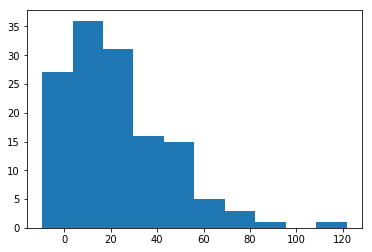

In [11]:
phaseArray = []

for spec in spec_array:
    phaseArray.append(spec.phase)
    
plt.hist(phaseArray)

In [14]:
def fluxGrid(spec_array):
    
    MINSTART = spec_array[0].x1
    MINEND = spec_array[0].x2

    for spec in spec_array:
        if spec.x1 < MINSTART:
            MINSTART = spec.x1
        if spec.x2 > MINEND:
            MINEND = spec.x2
    
    all_data = 0.0

    for spec in spec_array:
        all_data += len(spec.flux[~np.isnan(spec.flux)])
    
    length = len(spec_array[0].flux[~np.isnan(spec_array[0].flux)])

    for spec in spec_array:
        if length > len(spec.flux[~np.isnan(spec.flux)]):
            length = len(spec.flux[~np.isnan(spec.flux)])
    
    total_data = all_data
    data_percent = 0.0

    start = MINSTART

    bestStart = None
    bestLength = None

    while (start + length - 1 <= MINEND):
        total_data = all_data

        while (start + length - 1 <= MINEND):
            num_cols = len(spec_array)
            
            for spec in spec_array:
                array_start = spec.flux[:start]
                array_end = spec.flux[(start + length - 1):]
                new_array = spec.flux[start:(start + length)]

                total_data -= len(array_start[~np.isnan(array_start)])
                total_data -= len(array_end[~np.isnan(array_end)])

                if any(np.isnan(new_array)):
                    total_data -= len(new_array[~np.isnan(new_array)])
                    num_cols -= 1

            new_data = total_data/all_data

            if new_data > data_percent:
                data_percent = new_data
                bestStart = start
                bestLength = length
                best_num_cols = num_cols

            total_data = all_data
            start += 100

        start = MINSTART 
        length += 100
    
    MIN = bestStart
    MAX = bestStart + bestLength - 1

    num_rows = bestLength
    num_cols = best_num_cols
    
    grid = []
    k = 0
    
    while len(grid) < num_cols:
        if all(~np.isnan(spec_array[k].flux)[MIN:(MAX + 1)]):
            grid.append(spec_array[k].flux[MIN:(MAX + 1)])
        k += 1
    
    np.savetxt('../Filtered_Flux_Grid_phase_dm15_1.03.txt', grid)
    
    MIN = spec_array[0].wavelength[MIN]
    MAX = spec_array[0].wavelength[MAX]
    
    print (MIN, MAX)
    return (MIN, MAX)

In [15]:
MIN, MAX = fluxGrid(spec_array)

(3926.0, 7174.0)


In [10]:
grid = []

for spec in spec_array:
    grid.append(spec.dm15)
    print(spec.dm15)
    
np.savetxt('../Filtered_Flux_Grid_dm15', grid)

0.898541050009
0.898541050009
1.37
1.37
1.37
1.37
1.37
1.37
0.77
1.16
1.09
0.94
1.05
0.9
1.27
1.23
0.924470460184
0.86
1.18
0.99
1.46
1.0
1.09
1.03352873666
0.92
0.92
1.56
1.0
1.08
1.19
0.99
1.35
1.19
1.23
1.44
1.44
1.05
1.44
1.2
0.8
1.22
1.1
1.46
1.14
1.65
0.92
1.14
1.39
1.48242509003
1.00821961936
1.08
1.36
0.940148299422
1.1
1.1
1.27
0.88
0.88
0.89
0.89
0.89
1.56
1.56
1.56
1.56
1.56
1.19
0.87
1.02142208206
1.0
1.0
0.98
1.03427180785
0.81
1.55
1.55
0.88
1.3
1.5
1.06267601692
0.84
0.93
1.24
1.04
1.3
1.09
1.6
1.6
1.16
1.37489477809
1.2
0.96
1.01
1.01
1.64106422829
1.64106422829
1.03
1.1
1.02
1.37
1.37
1.37
1.37
1.37
0.94
0.77
0.94
0.94
0.94
1.16
1.07
1.07
1.26
1.26
1.26
1.08
1.14
1.14
1.14
1.14
1.14
1.09
1.09
0.94
0.94
1.04
1.04
1.04
1.04
1.4
1.04
1.11
1.11
1.11
1.79
1.79
1.03
1.03
1.03
1.17
1.17
1.17
1.17
1.17
1.32
1.08
1.08
1.27
1.27
1.14
0.85
0.85
0.85
0.85
0.85
0.85
0.85
0.85
0.85
0.78
0.78
0.78
0.78
0.78
0.78
0.78
0.78
0.78
1.23
1.23
1.35
1.35
1.17
1.17
1.17
1.17
1.17
1.17
1.17
0.

(array([ 15.,  98.,  92., 179., 104.,  65.,  72.,  37.,  20.,  15.]),
 array([0.69, 0.8 , 0.91, 1.02, 1.13, 1.24, 1.35, 1.46, 1.57, 1.68, 1.79]),
 <a list of 10 Patch objects>)

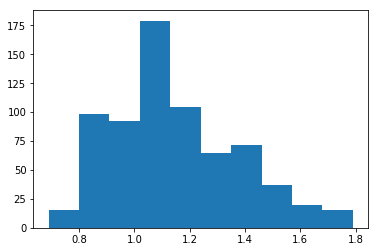

In [11]:
plt.hist(grid)

In [20]:
grid = []

for spec in spec_array:
    if spec.event_data['si_v0'] == None:
        grid.append(0)
    else:
        grid.append(spec.event_data['si_v0'])
    print(spec.event_data['si_v0'])
    
np.savetxt('../Filtered_Flux_Grid_velocity.txt', grid, '%s')

-12484.3881521
-12484.3881521
-11119.0090242
-11119.0090242
-11119.0090242
-11119.0090242
-11119.0090242
-11119.0090242
-5281.29246952
-10250.9470263
-9293.20730415
-11506.0654933
-17250.9593483
-12343.6112877
-13226.5594043
-10038.4792892
-11786.112616
-10878.5618715
-11263.2432111
None
None
-11905.3557251
-10599.5274802
-11865.2444123
-10112.8765281
-10112.8765281
None
-10892.7435719
-12869.319444
-10149.5775056
None
None
-12015.9287832
-11262.0576459
-11537.4594195
-11537.4594195
-6972.0133123
-9093.06681894
-11123.2017626
-9056.66752885
None
-10072.1581029
-10277.093729
-14558.3886685
None
-11385.7061279
-28457.504721
-11775.8976408
-9144.55883032
-11450.6805328
-13240.6236159
None
-9493.44899899
-9729.45156993
-9729.45156993
-11622.3472064
-8652.31724947
-8652.31724947
-9190.45214109
-9190.45214109
-9190.45214109
None
None
None
None
None
-15431.5113906
-7717.20676211
-10879.2712572
None
None
-12187.3884314
-11262.1460442
-11332.8216306
-11705.0900034
-11705.0900034
-12672.57142
-1

In [21]:
print(spec.event_data['si_v0'])

None


In [22]:
print(grid)

[-12484.388152136657, -12484.388152136657, -11119.009024216577, -11119.009024216577, -11119.009024216577, -11119.009024216577, -11119.009024216577, -11119.009024216577, -5281.292469516428, -10250.947026261883, -9293.207304152957, -11506.06549326932, -17250.959348331944, -12343.611287708132, -13226.55940430756, -10038.479289215215, -11786.112615954306, -10878.561871482476, -11263.243211120483, 0, 0, -11905.355725052483, -10599.527480192322, -11865.244412327449, -10112.876528141018, -10112.876528141018, 0, -10892.74357188909, -12869.319443972134, -10149.577505630352, 0, 0, -12015.928783153866, -11262.057645947498, -11537.459419533161, -11537.459419533161, -6972.01331229596, -9093.06681893687, -11123.201762619934, -9056.66752884891, 0, -10072.15810294089, -10277.09372898861, -14558.38866847458, 0, -11385.706127922447, -28457.50472103146, -11775.897640820893, -9144.558830317359, -11450.68053284324, -13240.623615882701, 0, -9493.44899898977, -9729.451569927844, -9729.451569927844, -11622.34

In [23]:
grid = []

for spec in spec_array:
    grid.append(spec.phase)
    print(spec.phase)
    
np.savetxt('../Filtered_Flux_Grid_phase.txt', grid)

-9.66304132767
-8.66879898507
-9.56631252882
-7.92568893218
-6.57247384882
-5.57452762216
-4.11852407745
-3.57863516883
-5.84826509087
-2.1768034995
-4.41866036556
-5.80525086128
-7.42682480293
-4.86520587957
-8.52180611589
-3.19960376424
-6.86135414204
-3.56098181356
-1.35590358063
-4.85566908045
-1.72992995557
-8.18976279651
-3.19401938128
-5.12550543583
-6.28907771765
-5.1936480508
-1.62805516097
-1.06458656253
-1.30745638493
-6.96354269864
-8.49404048747
-4.78832196677
-8.19403344386
-4.77607382341
-6.14798099484
-1.26102420152
-5.77184466019
-5.98898317994
-1.34909797218
-8.14696055703
-4.99685823385
-8.26593129956
-2.67712752871
-5.35452924355
-2.4259003955
-4.99116894806
-2.84290939758
-5.1019170987
-5.31947886238
-7.04085309307
-2.6238344844
-4.88444056494
-5.38217866844
-2.03783355739
-1.11579087516
-6.56215822093
-6.46856052176
-3.43545093816
-9.75939704319
-8.75640158469
-5.15412117113
-8.26066912605
-5.17476428761
-4.22707758099
-3.32085216779
-2.3514476408
-6.07808379342
-